In [1]:
# 共通事前処理

# 余分なワーニングを非表示にする
import warnings
warnings.filterwarnings('ignore')

# 必要ライブラリのimport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# matplotlib日本語化対応
import japanize_matplotlib

# データフレーム表示用関数
from IPython.display import display

# 表示オプション調整
# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

# pandasでの浮動小数点の表示精度
pd.options.display.float_format = '{:.4f}'.format

# データフレームですべての項目を表示
pd.set_option("display.max_columns",None)

# グラフのデフォルトフォント指定
plt.rcParams["font.size"] = 14

# 乱数の種
random_seed = 123

In [2]:
df = pd.read_csv('../input/sales.csv')

In [3]:
df

,NO,売上伝票日付,直送指定,委託区分,見積番号,得意先コード,得意先名,発送先コード,発送先名,自社担当者コード,請求得意先コード,得意先名_1,随時請求区分,請求予定日,請求書発行日,請求書発行済み,請求先送月数,回収日締切,発送予定日,広告企画区分,商品コード,数量,単価,金額
0,1,2017/3/1,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102005,8.0000,344,"2,735"
1,2,2017/3/1,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102027,6.0000,204,"1,317"
2,3,2017/3/1,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102029,10.0000,177,"1,720"
3,4,2017/3/1,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102040,6.0000,186,"1,058"
4,5,2017/3/1,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102041,4.0000,212,943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16629,16630,2021/1/30,0,0,NaN,ｗH-3001,酒原酒造(株),NaN,NaN,NaN,ｗH-3001,酒原酒造(株),0,2021/1/31,2021/1/31,1,0,NaN,2021/1/30,NaN,W102005,5.0000,474,"2,371"
16630,16631,2021/1/30,0,0,NaN,ｗH-3001,酒原酒造(株),NaN,NaN,NaN,ｗH-3001,酒原酒造(株),0,2021/1/31,2021/1/31,1,0,NaN,2021/1/30,NaN,W102027,5.0000,278,"1,388"
16631,16632,2021/1/30,0,0,NaN,ｗH-3001,酒原酒造(株),NaN,NaN,NaN,ｗH-3001,酒原酒造(株),0,2021/1/31,2021/1/31,1,0,NaN,2021/1/30,NaN,W102040,6.0000,253,"1,519"
16632,16633,2021/1/30,0,0,NaN,ｗH-3001,酒原酒造(株),NaN,NaN,NaN,ｗH-3001,酒原酒造(株),0,2021/1/31,2021/1/31,1,0,NaN,2021/1/30,NaN,W102027,6.0000,278,"1,665"


In [4]:
print(df.dtypes)

NO            int64
売上伝票日付       object
直送指定          int64
委託区分          int64
見積番号        float64
得意先コード       object
得意先名         object
発送先コード      float64
発送先名        float64
自社担当者コード    float64
請求得意先コード     object
得意先名_1       object
随時請求区分        int64
請求予定日        object
請求書発行日       object
請求書発行済み       int64
請求先送月数        int64
回収日締切        object
発送予定日        object
広告企画区分      float64
商品コード        object
数量          float64
単価           object
金額           object
dtype: object


In [5]:
df2 = df[['売上伝票日付', '金額']]

In [6]:
df2

,売上伝票日付,金額
0,2017/3/1,"2,735"
1,2017/3/1,"1,317"
2,2017/3/1,"1,720"
3,2017/3/1,"1,058"
4,2017/3/1,943
...,...,...
16629,2021/1/30,"2,371"
16630,2021/1/30,"1,388"
16631,2021/1/30,"1,519"
16632,2021/1/30,"1,665"


In [7]:
df3 = df2.groupby(['売上伝票日付']).sum()

In [8]:
df3

,金額
売上伝票日付,
2017/10/1,"1,1052,2101,3261,326"
2017/10/10,"1,3291,1051,7802,6961,5301,7682,8801,3261,3261..."
2017/10/11,"1,329-624-2734,5452,2901,7201,9401,9408403,560..."
2017/10/12,"6481,1051,1051,1452,6961,5901,5527,7357,7351,7..."
2017/10/13,"4,5454,5453,4401,3482,9102,6501,0701,7688,8401..."
...,...
2021/1/4,"1,2662,8701,4441,3884,7418618331,1551,266862724"
2021/1/5,"2,0741,2141,2571,0561,1081,2631,0054,9091,5053..."
2021/1/7,"1,6599711,2578451,1081,2637531,2662,8701,4441,..."


In [9]:
pd.read_csv?

In [10]:
df = pd.read_csv('../input/sales.csv', thousands=',', parse_dates=[1])

In [11]:
df

,NO,売上伝票日付,直送指定,委託区分,見積番号,得意先コード,得意先名,発送先コード,発送先名,自社担当者コード,請求得意先コード,得意先名_1,随時請求区分,請求予定日,請求書発行日,請求書発行済み,請求先送月数,回収日締切,発送予定日,広告企画区分,商品コード,数量,単価,金額
0,1,2017-03-01,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102005,8.0000,344,2735
1,2,2017-03-01,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102027,6.0000,204,1317
2,3,2017-03-01,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102029,10.0000,177,1720
3,4,2017-03-01,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102040,6.0000,186,1058
4,5,2017-03-01,0,0,NaN,ｗH-2501,㈱HBC,NaN,NaN,NaN,ｗH-2501,㈱HBC,0,2017/3/31,2017/3/31,0,0,2017/4/30,2017/4/27,NaN,W102041,4.0000,212,943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16629,16630,2021-01-30,0,0,NaN,ｗH-3001,酒原酒造(株),NaN,NaN,NaN,ｗH-3001,酒原酒造(株),0,2021/1/31,2021/1/31,1,0,NaN,2021/1/30,NaN,W102005,5.0000,474,2371
16630,16631,2021-01-30,0,0,NaN,ｗH-3001,酒原酒造(株),NaN,NaN,NaN,ｗH-3001,酒原酒造(株),0,2021/1/31,2021/1/31,1,0,NaN,2021/1/30,NaN,W102027,5.0000,278,1388
16631,16632,2021-01-30,0,0,NaN,ｗH-3001,酒原酒造(株),NaN,NaN,NaN,ｗH-3001,酒原酒造(株),0,2021/1/31,2021/1/31,1,0,NaN,2021/1/30,NaN,W102040,6.0000,253,1519
16632,16633,2021-01-30,0,0,NaN,ｗH-3001,酒原酒造(株),NaN,NaN,NaN,ｗH-3001,酒原酒造(株),0,2021/1/31,2021/1/31,1,0,NaN,2021/1/30,NaN,W102027,6.0000,278,1665


In [12]:
print(df.dtypes)

NO                   int64
売上伝票日付      datetime64[ns]
直送指定                 int64
委託区分                 int64
見積番号               float64
得意先コード              object
得意先名                object
発送先コード             float64
発送先名               float64
自社担当者コード           float64
請求得意先コード            object
得意先名_1              object
随時請求区分               int64
請求予定日               object
請求書発行日              object
請求書発行済み              int64
請求先送月数               int64
回収日締切               object
発送予定日               object
広告企画区分             float64
商品コード               object
数量                 float64
単価                   int64
金額                   int64
dtype: object


In [13]:
df2 = df[['売上伝票日付', '金額']]

In [14]:
df2

,売上伝票日付,金額
0,2017-03-01,2735
1,2017-03-01,1317
2,2017-03-01,1720
3,2017-03-01,1058
4,2017-03-01,943
...,...,...
16629,2021-01-30,2371
16630,2021-01-30,1388
16631,2021-01-30,1519
16632,2021-01-30,1665


In [15]:
df2.dtypes

売上伝票日付    datetime64[ns]
金額                 int64
dtype: object

In [16]:
df3 = df2.groupby(['売上伝票日付']).sum()

In [17]:
df3

,金額
売上伝票日付,
2017-03-01,8213
2017-03-02,4307
2017-03-03,19571
2017-03-04,14965
2017-03-05,17022
...,...
2021-01-25,41993
2021-01-26,24036
2021-01-28,27323


In [18]:
# 欠損値チェック
df3.isnull().sum()

金額    0
dtype: int64

In [19]:
df3.dtypes

金額    int64
dtype: object

In [20]:
df3 = pd.DataFrame(df3.reset_index())

In [21]:
df3.dtypes

売上伝票日付    datetime64[ns]
金額                 int64
dtype: object

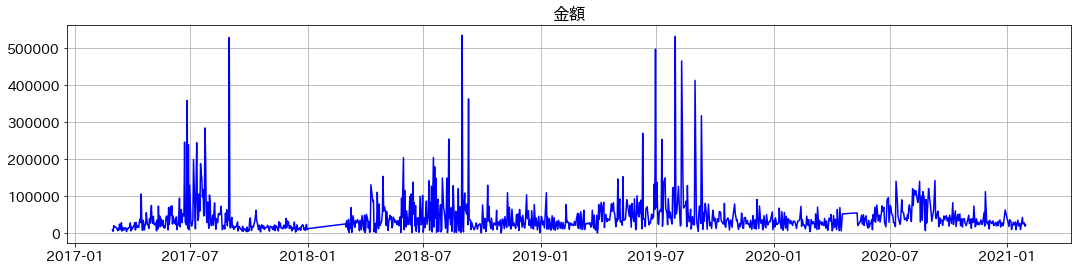

In [22]:
# 時系列グラフの描画 (売上金額)
plt.figure(figsize=(18,4))

# グラフ描画
plt.plot(df3['売上伝票日付'], df3['金額'], c='b')

# 方眼表示など
plt.grid()
plt.title('金額')

# 画面出力
plt.show()

In [23]:
df3.tail()

,売上伝票日付,金額
1111,2021-01-25,41993
1112,2021-01-26,24036
1113,2021-01-28,27323
1114,2021-01-29,17977
1115,2021-01-30,21659


In [24]:
import datetime as dt

In [25]:
df4 = df3[(dt.datetime(2019,2,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(2019,3,1))]

In [26]:
df5 = df3[(dt.datetime(2020,2,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(2020,3,1))]

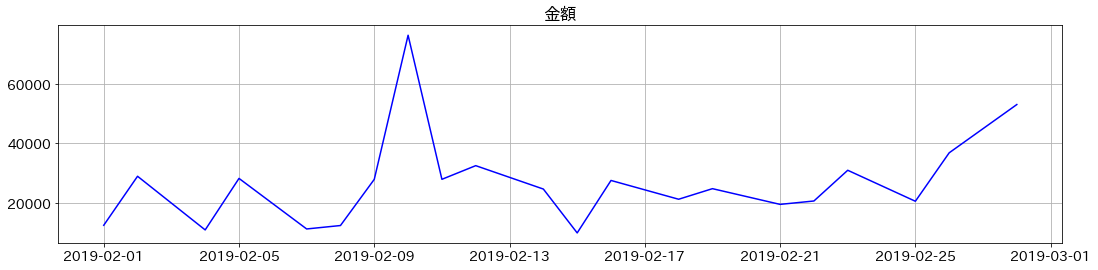

In [27]:
# 時系列グラフの描画 (売上金額)
plt.figure(figsize=(18,4))

# グラフ描画
plt.plot(df4['売上伝票日付'], df4['金額'], c='b')

# 方眼表示など
plt.grid()
plt.title('金額')

# 画面出力
plt.show()

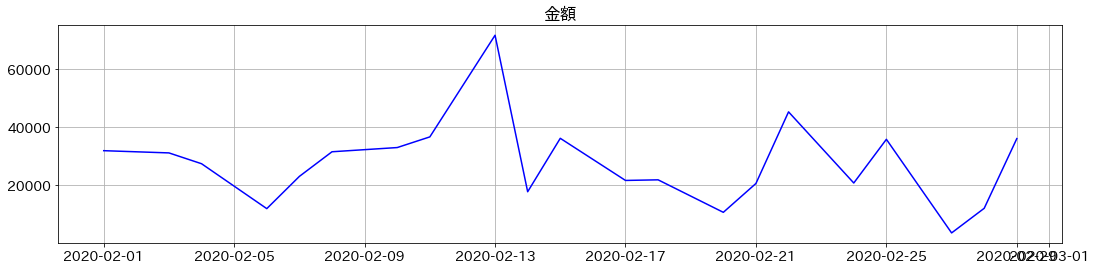

In [28]:
# 時系列グラフの描画 (売上金額)
plt.figure(figsize=(18,4))

# グラフ描画
plt.plot(df5['売上伝票日付'], df5['金額'], c='b')

# 方眼表示など
plt.grid()
plt.title('金額')

# 画面出力
plt.show()

In [29]:
df4

,売上伝票日付,金額
590,2019-02-01,12419
591,2019-02-02,28922
592,2019-02-04,10856
593,2019-02-05,28199
594,2019-02-07,11180
595,2019-02-08,12335
596,2019-02-09,27887
597,2019-02-10,76403
598,2019-02-11,27896
599,2019-02-12,32493


In [30]:
df5

,売上伝票日付,金額
870,2020-02-01,31951
871,2020-02-03,31182
872,2020-02-04,27446
873,2020-02-06,11936
874,2020-02-07,23074
875,2020-02-08,31578
876,2020-02-10,33031
877,2020-02-11,36713
878,2020-02-13,71822
879,2020-02-14,17769


In [31]:
df4.sum()

金額    557876
dtype: int64

In [32]:
df5.sum()

金額    581325
dtype: int64

In [33]:
# df4 = df3[(dt.datetime(2019,2,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(2019,3,1))]
df4 = df3[(dt.datetime(2019,1,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(2020,1,1))]

In [34]:
# df5 = df3[(dt.datetime(2020,2,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(2020,3,1))]
df5 = df3[(dt.datetime(2020,1,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(2021,1,1))]

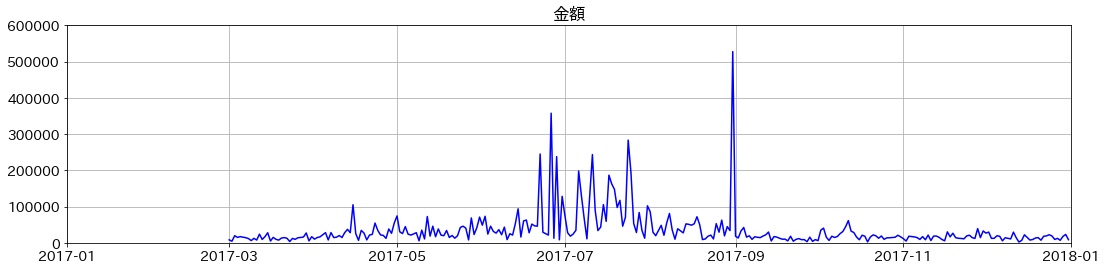

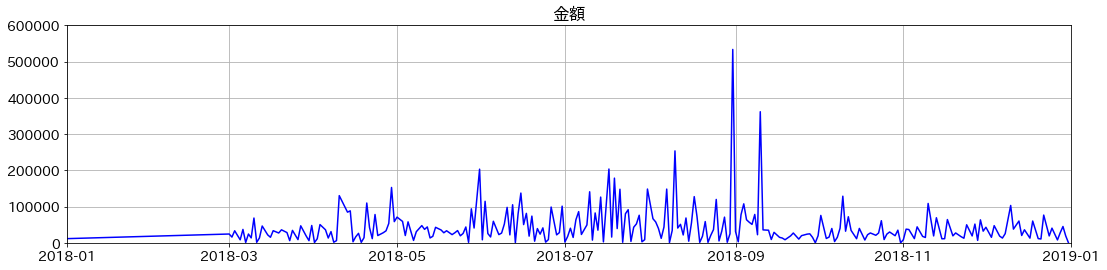

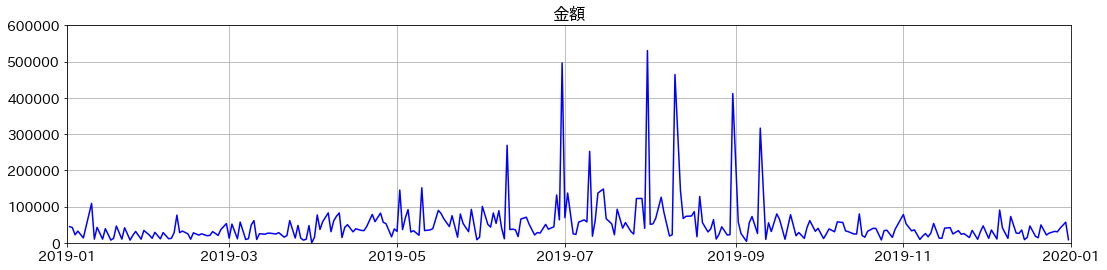

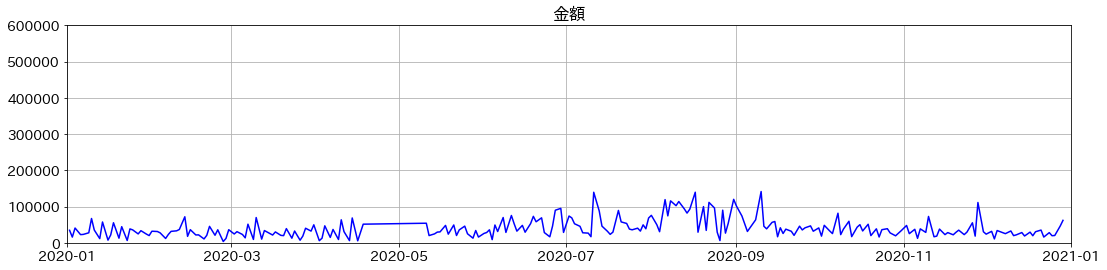

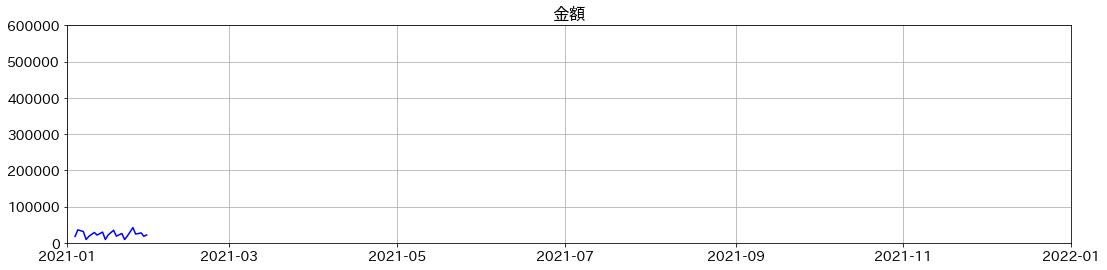

In [35]:
for year in [2017, 2018, 2019, 2020, 2021]:
    df4 = df3[(dt.datetime(year,1,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(year+1,1,1))]
    
    fig = plt.figure(figsize=(18,4))
    ax = fig.add_subplot(111)
    ax.set_title('金額')
    ax.set_xlim(dt.datetime(year,1,1), dt.datetime(year+1,1,1))
    ax.set_ylim(0, 600000)
    ax.plot(df4['売上伝票日付'], df4['金額'], c='b')
    ax.grid()
    plt.show()

In [36]:
df3[(dt.datetime(2019,1,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(2019,2,1))].sum()

金額    653267
dtype: int64

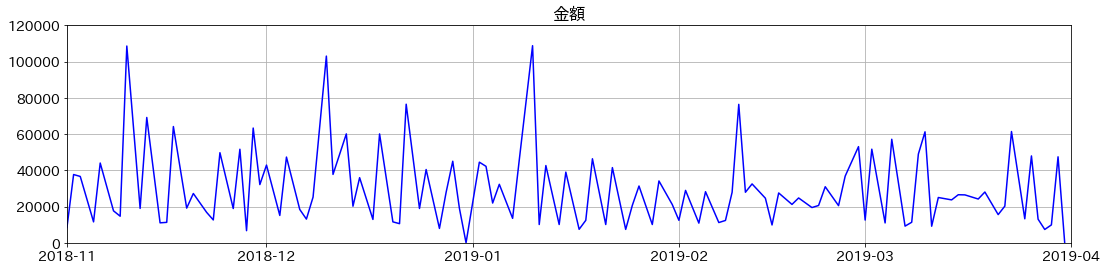

金額    3375115
dtype: int64


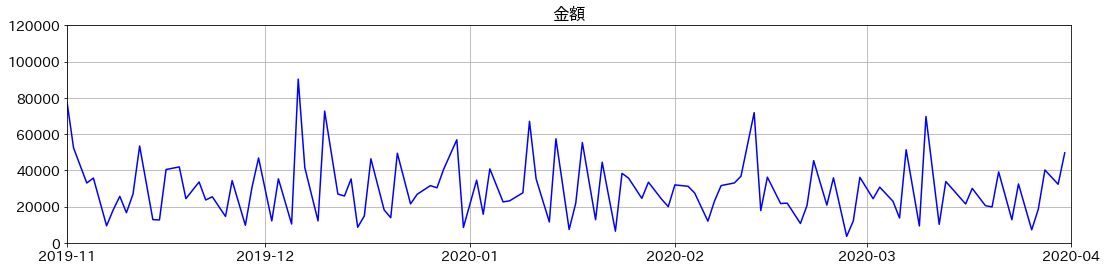

金額    3289948
dtype: int64


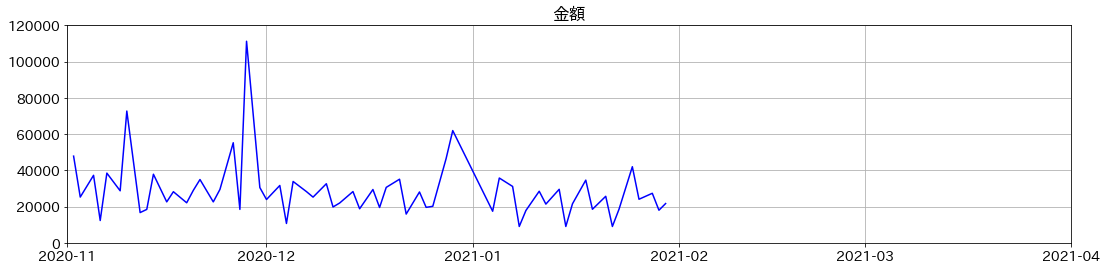

金額    1781312
dtype: int64


In [37]:
for year in [2019, 2020, 2021]:
    start = dt.datetime(year-1, 11, 1)
    end = dt.datetime(year, 4, 1)

    df4 = df3[(start <= df3['売上伝票日付']) & (df3['売上伝票日付'] < end)]
    #df4 = df3[(start <= df3['売上伝票日付'] < end)]
    
    fig = plt.figure(figsize=(18,4))
    ax = fig.add_subplot(111)
    ax.set_title('金額')
    ax.set_xlim(start, end)
    ax.set_ylim(0, 120000)
    ax.plot(df4['売上伝票日付'], df4['金額'], c='b')
    ax.grid()
    plt.show()
    print(df4.sum())

In [38]:
year=2019
df3[(dt.datetime(year,2,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(year,3,1))]

,売上伝票日付,金額
590,2019-02-01,12419
591,2019-02-02,28922
592,2019-02-04,10856
593,2019-02-05,28199
594,2019-02-07,11180
595,2019-02-08,12335
596,2019-02-09,27887
597,2019-02-10,76403
598,2019-02-11,27896
599,2019-02-12,32493


In [39]:
d = dt.datetime(2019,2,10)

In [40]:
d

datetime.datetime(2019, 2, 10, 0, 0)

In [41]:
d??

In [42]:
d.weekday()

6

In [43]:
dt.datetime(2020,2,13).weekday()

3

In [44]:
dt.datetime(2022,1,10).weekday()

0

In [45]:
dt.datetime(2022,1,10,12,0,0).weekday()

0

<AxesSubplot:>

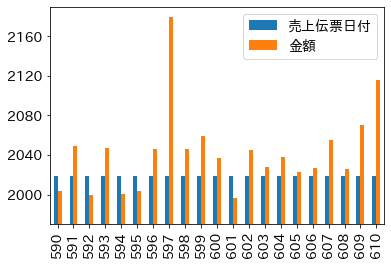

In [46]:
df3[(dt.datetime(year,2,1) <= df3['売上伝票日付']) & (df3['売上伝票日付'] < dt.datetime(year,3,1))].plot.bar()

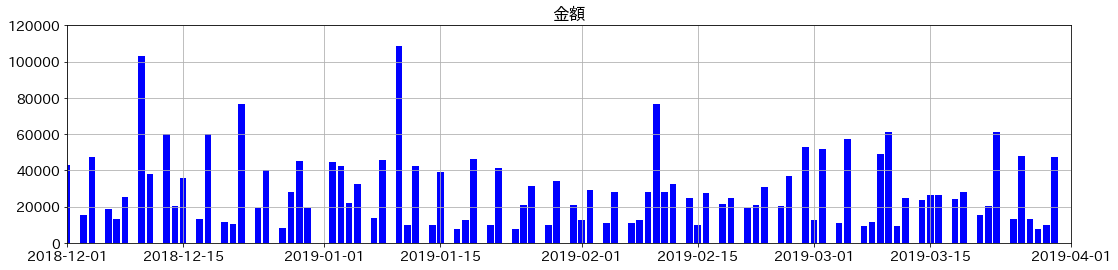

金額    2623115
dtype: int64


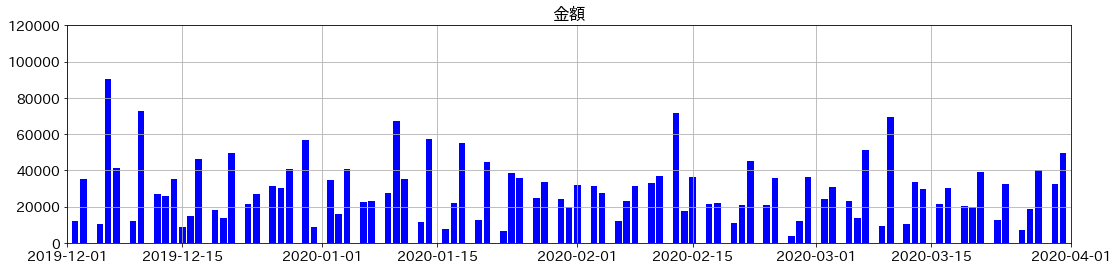

金額    2590128
dtype: int64


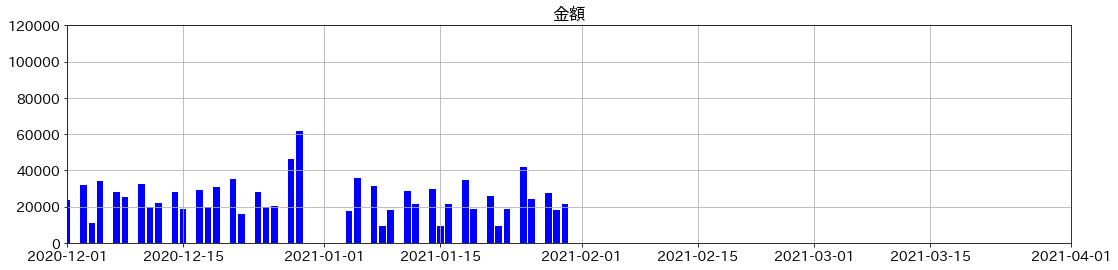

金額    1041763
dtype: int64


In [47]:
for year in [2019, 2020, 2021]:
    start = dt.datetime(year-1, 12, 1)
    end = dt.datetime(year, 4, 1)

    df4 = df3[(start <= df3['売上伝票日付']) & (df3['売上伝票日付'] < end)]
    #df4 = df3[(start <= df3['売上伝票日付'] < end)]
    
    fig = plt.figure(figsize=(18,4))
    ax = fig.add_subplot(111)
    ax.set_title('金額')
    ax.set_xlim(start, end)
    ax.set_ylim(0, 120000)
    ax.bar(df4['売上伝票日付'], df4['金額'], color='b')
    ax.grid()
    plt.show()
    print(df4.sum())

In [52]:
df3

,売上伝票日付,金額
0,2017-03-01,8213
1,2017-03-02,4307
2,2017-03-03,19571
3,2017-03-04,14965
4,2017-03-05,17022
...,...,...
1111,2021-01-25,41993
1112,2021-01-26,24036
1113,2021-01-28,27323
1114,2021-01-29,17977


In [48]:
# Prophet by Facebook 
from prophet import Prophet

In [49]:
df5 = df3.copy()
df5['ds'] = df5['売上伝票日付']
df5['y'] = df5['金額']

mday = pd.to_datetime('2021-2-1')
train_index = df5['ds'] < mday
test_index = df5['ds'] >= mday

x = df5[['ds']]
x_train = df5[train_index]
x_test = df5[test_index]

y = df5['y']
y_train = df5['y'][train_index]
y_test = df5['y'][test_index]

dates_train = df5['ds'][train_index]
dates_test = df5['ds'][test_index]

In [50]:
x_train

,売上伝票日付,金額,ds,y
0,2017-03-01,8213,2017-03-01,8213
1,2017-03-02,4307,2017-03-02,4307
2,2017-03-03,19571,2017-03-03,19571
3,2017-03-04,14965,2017-03-04,14965
4,2017-03-05,17022,2017-03-05,17022
...,...,...,...,...
1111,2021-01-25,41993,2021-01-25,41993
1112,2021-01-26,24036,2021-01-26,24036
1113,2021-01-28,27323,2021-01-28,27323
1114,2021-01-29,17977,2021-01-29,17977


Initial log joint probability = -8.61452
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2148.47    0.00456201        420.29           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       2149.39   1.89688e-06        435.82   3.469e-09       0.001      282  LS failed, Hessian reset 
     199        2149.4   1.14521e-07       363.406           1           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204        2149.4   9.99745e-09       422.897      0.1532      0.1532      301   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


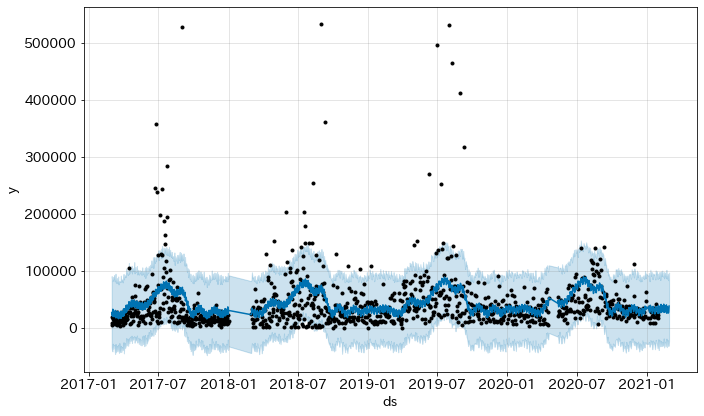

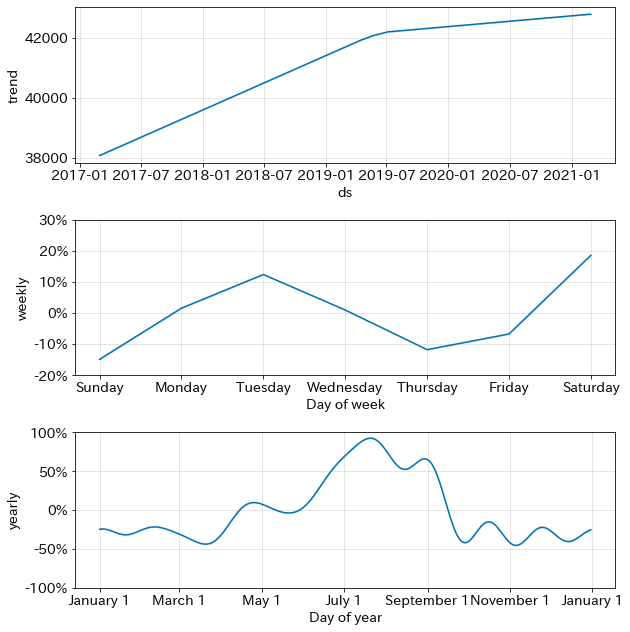

In [51]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False,
    changepoint_prior_scale=0.01, seasonality_mode='multiplicative')
#model.add_seasonality(name='1-period', period=150, fourier_order=5)
model.fit(x_train)

#future = df2[['ds']]
future = model.make_future_dataframe(periods=28)
forecast = model.predict(future)

fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [213]:
df5 = pd.DataFrame()

#years = [2017, 2018, 2019, 2020, 2021]
#years = [2019, 2020, 2021]
years = [2021]

for year in years:
#    start = dt.datetime(year, 1, 1)
#    end = dt.datetime(year+1, 1, 1)
    start = dt.datetime(year-1, 10, 1)
    end = dt.datetime(year, 3, 1)

    df4 = df3[(start <= df3['売上伝票日付']) & (df3['売上伝票日付'] < end)]
    df5 = df5.append(df4)


In [214]:
df5['ds'] = df5['売上伝票日付']
df5['y'] = df5['金額']

mday = pd.to_datetime('2021-2-1')
train_index = df5['ds'] < mday
test_index = df5['ds'] >= mday

x_train = df5[train_index]
x_test = df5[test_index]

y_train = df5['y'][train_index]
y_test = df5['y'][test_index]

dates_train = df5['ds'][train_index]
dates_test = df5['ds'][test_index]

In [221]:
from dateutil.relativedelta import relativedelta


In [222]:
relativedelta?

In [242]:
l = []
#for y in [2019, 2020, 2021]:
y = 2019
for i in range(790):
    d = dt.datetime(y, 1, 1) + relativedelta(days=i) 
    day = d.weekday()
    if day == 2 or day == 6:
        l.append(d)
    else:
        pass


In [243]:
l[-20:]

[datetime.datetime(2020, 12, 23, 0, 0),
 datetime.datetime(2020, 12, 27, 0, 0),
 datetime.datetime(2020, 12, 30, 0, 0),
 datetime.datetime(2021, 1, 3, 0, 0),
 datetime.datetime(2021, 1, 6, 0, 0),
 datetime.datetime(2021, 1, 10, 0, 0),
 datetime.datetime(2021, 1, 13, 0, 0),
 datetime.datetime(2021, 1, 17, 0, 0),
 datetime.datetime(2021, 1, 20, 0, 0),
 datetime.datetime(2021, 1, 24, 0, 0),
 datetime.datetime(2021, 1, 27, 0, 0),
 datetime.datetime(2021, 1, 31, 0, 0),
 datetime.datetime(2021, 2, 3, 0, 0),
 datetime.datetime(2021, 2, 7, 0, 0),
 datetime.datetime(2021, 2, 10, 0, 0),
 datetime.datetime(2021, 2, 14, 0, 0),
 datetime.datetime(2021, 2, 17, 0, 0),
 datetime.datetime(2021, 2, 21, 0, 0),
 datetime.datetime(2021, 2, 24, 0, 0),
 datetime.datetime(2021, 2, 28, 0, 0)]

In [244]:
holidays = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(l),
  'lower_window': 0,
  'upper_window': 1,
})


In [249]:
#model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False,
#    changepoint_prior_scale=0.01, seasonality_mode='multiplicative')
#model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False)
model = Prophet(yearly_seasonality=False, weekly_seasonality=True, daily_seasonality=False, holidays=holidays)
#model.add_seasonality(name='1-period', period=150, fourier_order=5)
#model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(x_train)

#future = df2[['ds']]
future = model.make_future_dataframe(periods=29)
forecast = model.predict(future)



Initial log joint probability = -54.4155
Iteration  1. Log joint probability =    34.9367. Improved by 89.3521.
Iteration  2. Log joint probability =    118.497. Improved by 83.5599.
Iteration  3. Log joint probability =    130.757. Improved by 12.2609.
Iteration  4. Log joint probability =    130.791. Improved by 0.0337829.
Iteration  5. Log joint probability =    130.835. Improved by 0.0438587.
Iteration  6. Log joint probability =    130.838. Improved by 0.00276833.
Iteration  7. Log joint probability =    130.859. Improved by 0.0213723.
Iteration  8. Log joint probability =    130.883. Improved by 0.0239433.
Iteration  9. Log joint probability =    131.059. Improved by 0.17545.
Iteration 10. Log joint probability =    131.122. Improved by 0.0634173.
Iteration 11. Log joint probability =    131.142. Improved by 0.0197699.
Iteration 12. Log joint probability =    131.228. Improved by 0.0867358.
Iteration 13. Log joint probability =     131.44. Improved by 0.211152.
Iteration 14. Log

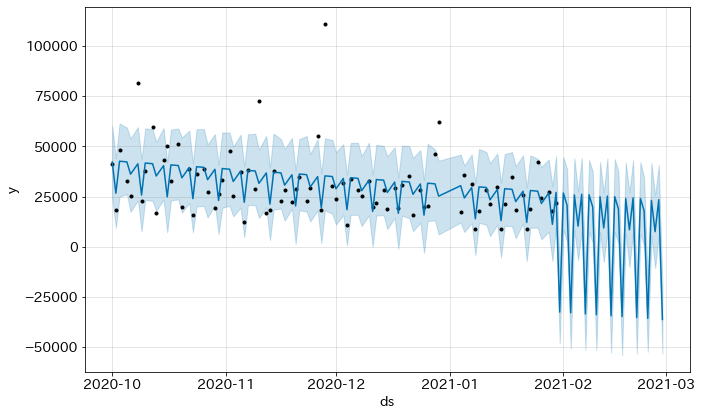

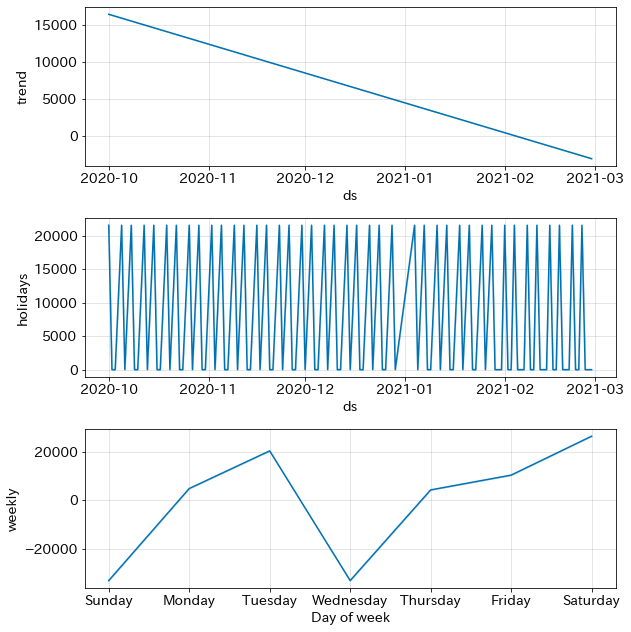

In [250]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [251]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(28)

,ds,yhat,yhat_lower,yhat_upper
86,2021-02-01,26774.7018,8686.5360,44673.9256
87,2021-02-02,20647.6716,2295.5692,38663.8708
88,2021-02-03,-32992.2837,-50893.7428,-13712.2919
89,2021-02-04,25816.8235,8431.2985,44053.9104
90,2021-02-05,10250.3285,-6716.4592,27376.9100
91,2021-02-06,26185.5947,7584.7621,44327.2105
92,2021-02-07,-33513.9800,-51377.2179,-14707.4793
93,2021-02-08,25861.7268,7744.9718,43277.0725
94,2021-02-09,19734.6966,1695.4342,37444.6699
95,2021-02-10,-33905.2587,-51419.6033,-16844.4346


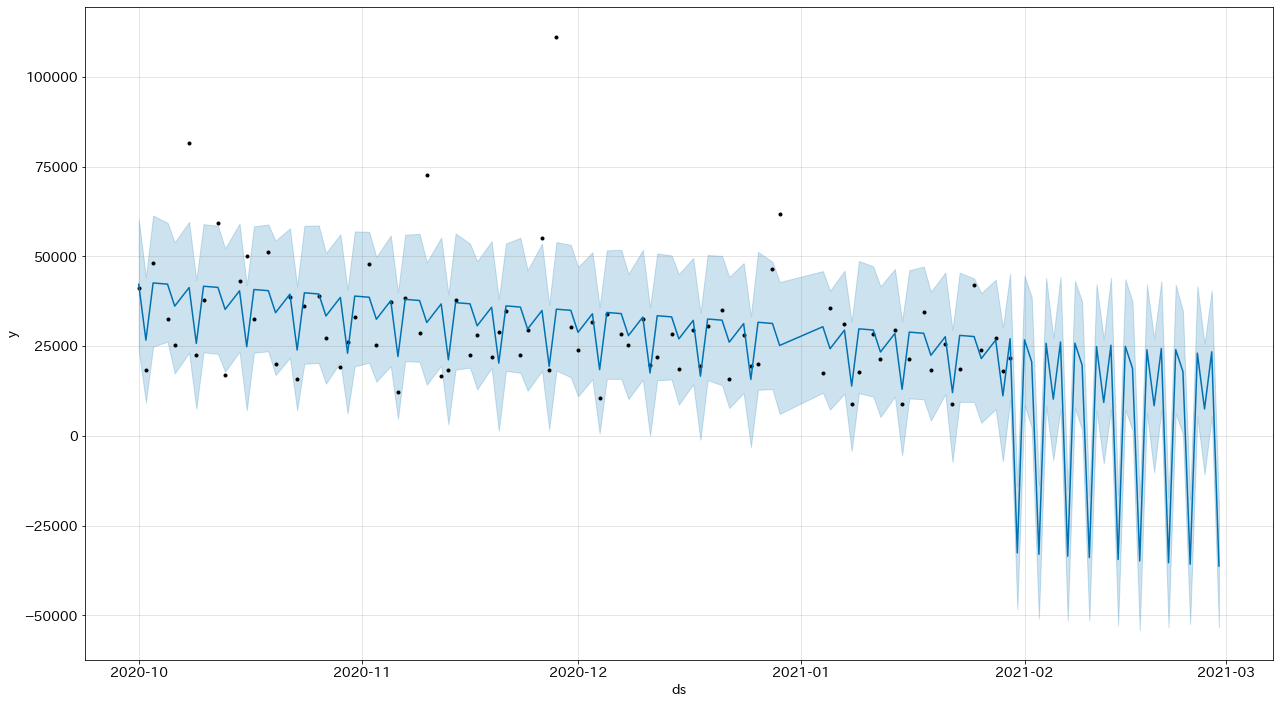

In [252]:
fig1 = model.plot(forecast, figsize=(18,10))

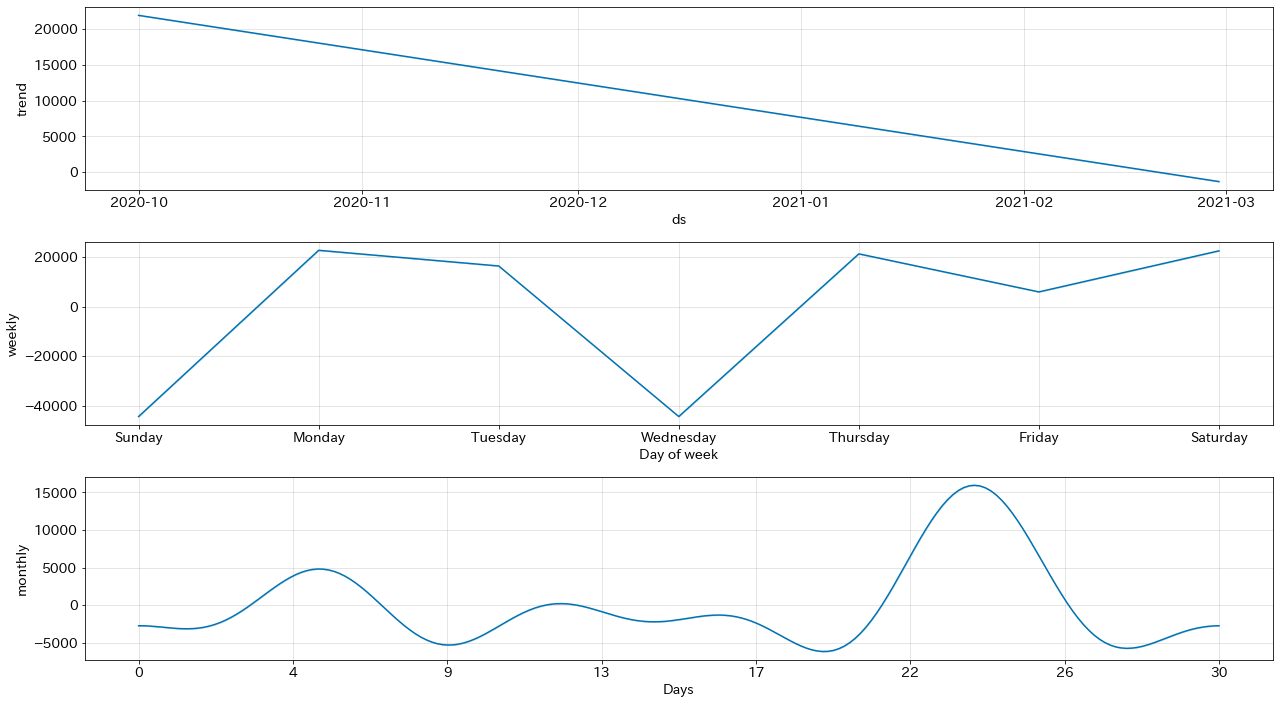

In [220]:
fig2 = model.plot_components(forecast, figsize=(18,10))

In [253]:
df6 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(28)

In [254]:
df6

,ds,yhat,yhat_lower,yhat_upper
86,2021-02-01,26774.7018,8686.5360,44673.9256
87,2021-02-02,20647.6716,2295.5692,38663.8708
88,2021-02-03,-32992.2837,-50893.7428,-13712.2919
89,2021-02-04,25816.8235,8431.2985,44053.9104
90,2021-02-05,10250.3285,-6716.4592,27376.9100
91,2021-02-06,26185.5947,7584.7621,44327.2105
92,2021-02-07,-33513.9800,-51377.2179,-14707.4793
93,2021-02-08,25861.7268,7744.9718,43277.0725
94,2021-02-09,19734.6966,1695.4342,37444.6699
95,2021-02-10,-33905.2587,-51419.6033,-16844.4346


In [268]:
df6['Id'] = df6['ds'].apply(lambda x: x.strftime('%Y/%-m/%-d'))
df6['Expected'] = df6['yhat'].astype('int')
df6

,ds,yhat,yhat_lower,yhat_upper,Id,Expected
86,2021-02-01,26774.7018,8686.5360,44673.9256,2021/2/1,26774
87,2021-02-02,20647.6716,2295.5692,38663.8708,2021/2/2,20647
88,2021-02-03,-32992.2837,-50893.7428,-13712.2919,2021/2/3,-32992
89,2021-02-04,25816.8235,8431.2985,44053.9104,2021/2/4,25816
90,2021-02-05,10250.3285,-6716.4592,27376.9100,2021/2/5,10250
91,2021-02-06,26185.5947,7584.7621,44327.2105,2021/2/6,26185
92,2021-02-07,-33513.9800,-51377.2179,-14707.4793,2021/2/7,-33513
93,2021-02-08,25861.7268,7744.9718,43277.0725,2021/2/8,25861
94,2021-02-09,19734.6966,1695.4342,37444.6699,2021/2/9,19734
95,2021-02-10,-33905.2587,-51419.6033,-16844.4346,2021/2/10,-33905


In [269]:
# df7 = df6[df6.yhat > 0].rename(columns={'ds':'Id', 'yhat':'Expected'}).drop(columns=['yhat_lower', 'yhat_upper'])
df7 = df6[df6.yhat > 0].drop(columns=['ds', 'yhat', 'yhat_lower', 'yhat_upper'])

In [270]:
df7

,Id,Expected
86,2021/2/1,26774
87,2021/2/2,20647
89,2021/2/4,25816
90,2021/2/5,10250
91,2021/2/6,26185
93,2021/2/8,25861
94,2021/2/9,19734
96,2021/2/11,24903
97,2021/2/12,9337
98,2021/2/13,25272


In [271]:
df7.to_csv('../output/submission.csv', index=False)